In [23]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
pwd

'/Users/kangjiwon/Desktop/HACKATHON/Credit-rating-classification/EDA/kangjiwon'

In [3]:
df = pd.read_csv("../../data/train.csv")

In [8]:
df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [4]:
# 대출기간 숫자 추출
df['대출기간'] = df['대출기간'].str[0:3].str.strip().astype(int)

In [7]:
# 근로기간 숫자 추출
df['근로기간'].value_counts()

# '근로기간' 열의 각 값이 문자열인지 확인하고 숫자 추출
df['근로기간'] = df['근로기간'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else 'Unknown')

In [22]:
df['부채_대비_소득_비율'].value_counts().sort_index()

부채_대비_소득_비율
0.00       17
0.03        1
0.04        1
0.08        1
0.09        1
           ..
120.66      1
125.25      1
672.52      1
1092.52     1
9999.00     1
Name: count, Length: 4025, dtype: int64

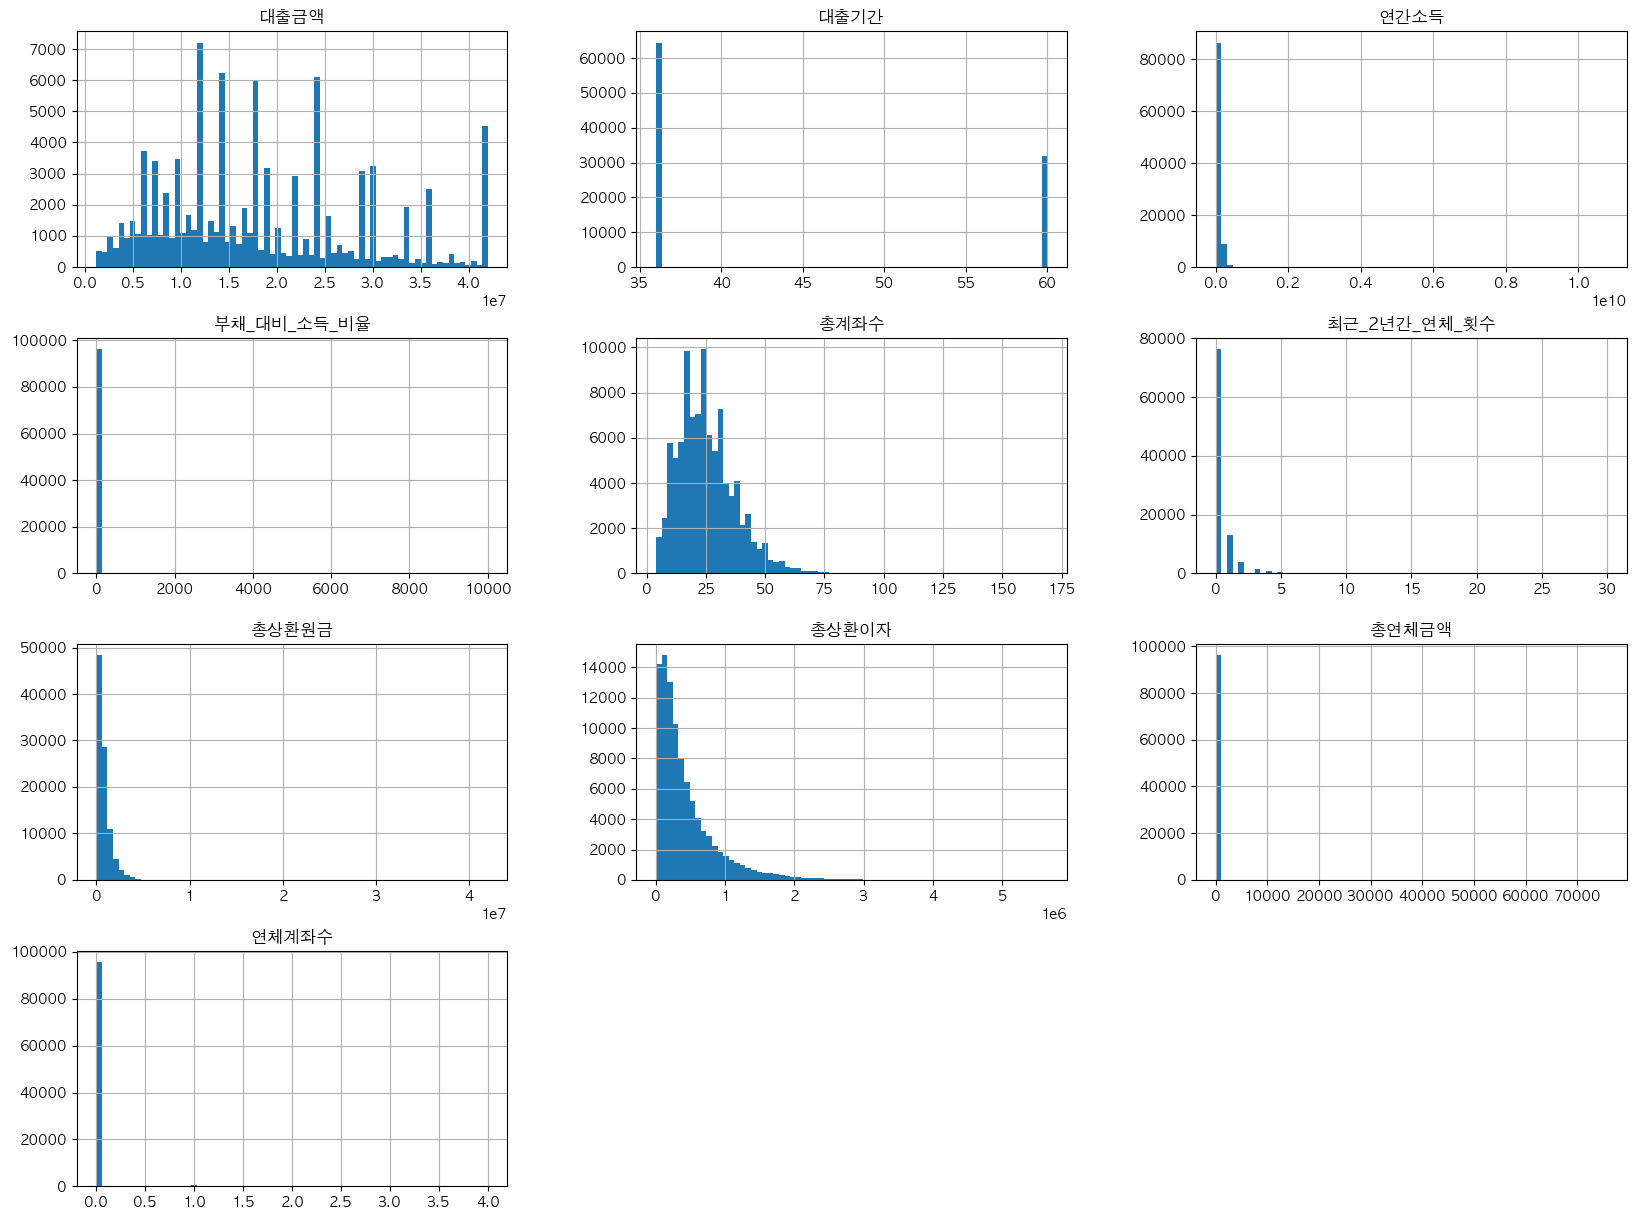

In [36]:
import matplotlib.pyplot as plt

df.hist(bins=70, figsize=(20,15))

# sns.distplot(df['부채_대비_소득_비율'])
plt.axis()
plt.show()
    

### Sampling

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set, validation_set = train_test_split(df, test_size=0.2, stratify=df['대출등급'], random_state=42)